In [12]:
%matplotlib inline
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [15]:
data = pd.read_csv(
    os.path.join('train.csv.bz2')
)



week  weekday  Holidays      Name
0    51        4         1  Chritmas
1    51        5         1  Chritmas
2    51        6         1  Chritmas
3    52        0         1  Chritmas
4    52        1         1  Chritmas

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateOfDeparture   8902 non-null   object 
 1   Departure         8902 non-null   object 
 2   Arrival           8902 non-null   object 
 3   WeeksToDeparture  8902 non-null   float64
 4   log_PAX           8902 non-null   float64
 5   std_wtd           8902 non-null   float64
dtypes: float64(3), object(3)
memory usage: 417.4+ KB


In [5]:
data['Arrival'].value_counts()

ORD    1101
ATL    1000
LAX     764
SFO     692
DEN     615
BOS     578
DFW     558
LGA     496
LAS     436
EWR     413
PHL     365
JFK     292
MCO     287
SEA     273
MIA     213
MSP     207
DTW     195
IAH     141
CLT     139
PHX     137
Name: Arrival, dtype: int64

In [6]:
data['Departure'].value_counts()

ORD    1038
ATL     990
LAX     758
SFO     693
DFW     648
DEN     640
BOS     509
LGA     466
LAS     419
EWR     410
JFK     364
PHL     354
SEA     280
MIA     233
MSP     230
DTW     228
MCO     202
CLT     161
IAH     140
PHX     139
Name: Departure, dtype: int64

In [4]:
import pandas_profiling
data.profile_report()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dde0da0>,
      dtype=object)

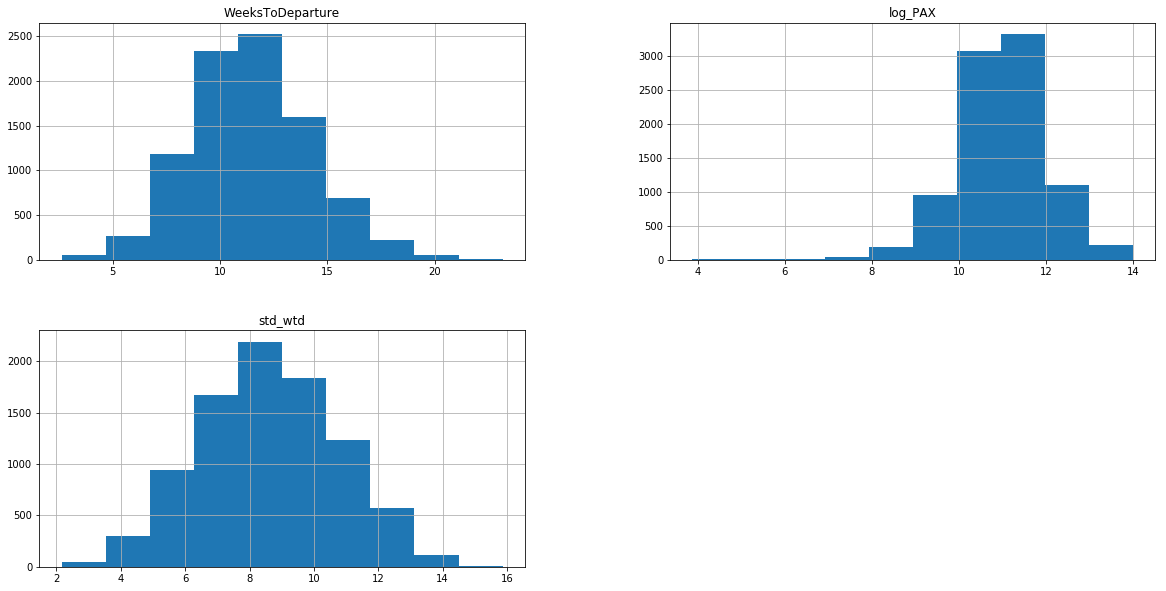

In [6]:
data.hist(figsize=(20, 10))

In [7]:
data[:4000]

DateOfDeparture Departure Arrival  WeeksToDeparture    log_PAX    std_wtd
0         2012-06-19       ORD     DFW         12.875000  12.331296   9.812647
1         2012-09-10       LAS     DEN         14.285714  10.775182   9.466734
2         2012-10-05       DEN     LAX         10.863636  11.083177   9.035883
3         2011-10-09       ATL     ORD         11.480000  11.169268   7.990202
4         2012-02-21       DEN     SFO         11.450000  11.269364   9.517159
...              ...       ...     ...               ...        ...        ...
3995      2012-07-08       MSP     ATL         11.541667  10.252085   8.459516
3996      2013-01-11       JFK     MIA         12.333333   9.765837  13.119959
3997      2013-01-04       LAX     EWR         14.000000   9.499721  11.105554
3998      2012-06-10       SEA     DEN         12.384615  10.887226   9.024752
3999      2011-10-19       SEA     SFO         13.384615  11.544788  10.032256

[4000 rows x 6 columns]

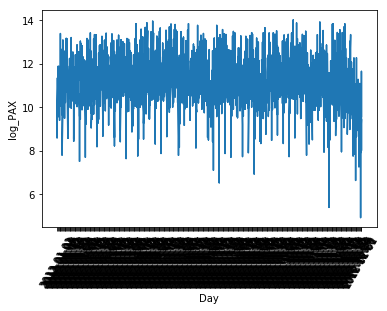

In [12]:
X = data.sort_values('DateOfDeparture')
X = X.set_index('DateOfDeparture')
X0 = X['2012-01-01' : '2013-01-01']
X1 = X['2012-01-01' : '2012-03-01']
X2 = X['2012-03-01' : '2012-05-01']
X3 = X['2012-05-01' : '2012-07-01']
X4 = X['2012-07-01' : '2012-09-01']
X5 = X['2012-09-01' : '2012-11-01']
X6 = X['2012-11-01' : '2013-01-01']

%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Day")
plt.ylabel("log_PAX")
plt.plot(X0['log_PAX'])
plt.xticks(rotation=60);


In [26]:
print(X0.mean())
print(X1.mean())
print(X2.mean())
print(X3.mean())
print(X4.mean())
print(X5.mean())
print(X6.mean())

WeeksToDeparture    11.605043
log_PAX             11.021793
std_wtd              8.835562
dtype: float64
WeeksToDeparture    10.730794
log_PAX             10.937109
std_wtd              8.359646
dtype: float64
WeeksToDeparture    10.663613
log_PAX             11.113445
std_wtd              8.405839
dtype: float64
WeeksToDeparture    11.537785
log_PAX             11.238413
std_wtd              8.677560
dtype: float64
WeeksToDeparture    12.667740
log_PAX             11.000994
std_wtd              9.161830
dtype: float64
WeeksToDeparture    12.520288
log_PAX             11.134631
std_wtd              9.480568
dtype: float64
WeeksToDeparture    11.598777
log_PAX             10.711440
std_wtd              8.994718
dtype: float64


In [28]:
X = data.copy()  # modify a copy of X
    
X.loc[:, "DateOfDeparture"] = pd.to_datetime(X['DateOfDeparture'])
# Encode the date information from the DateOfDeparture columns
X.loc[:, 'year'] = X['DateOfDeparture'].dt.year
X.loc[:, 'month'] = X['DateOfDeparture'].dt.month
X.loc[:, 'day'] = X['DateOfDeparture'].dt.day
X.loc[:, 'weekday'] = X['DateOfDeparture'].dt.weekday
X.loc[:, 'week'] = X['DateOfDeparture'].dt.week
X.loc[:, 'n_days'] = X['DateOfDeparture'].apply(
        lambda date: (date - pd.to_datetime("1970-01-01")).days
    )

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [30]:
X['hight'] = np.where((X['log_PAX']>12)  , 1, 0)
X['low'] = np.where((X['log_PAX']<8)  , 1, 0)

In [36]:
pd.crosstab(index=X['hight'], columns=X['Arrival']).apply(lambda r: r/r.sum(), axis=0)*100

Arrival   ATL        BOS        CLT        DEN        DFW    DTW        EWR  \
hight                                                                         
0        89.0  84.602076  98.561151  99.837398  82.258065  100.0  93.220339   
1        11.0  15.397924   1.438849   0.162602  17.741935    0.0   6.779661   

Arrival    IAH        JFK        LAS   LAX        LGA        MCO        MIA  \
hight                                                                         
0        100.0  59.931507  98.165138  75.0  74.193548  95.470383  99.530516   
1          0.0  40.068493   1.834862  25.0  25.806452   4.529617   0.469484   

Arrival        MSP        ORD        PHL        PHX      SEA        SFO  
hight                                                                    
0        87.439614  72.116258  92.876712  99.270073  99.6337  79.479769  
1        12.560386  27.883742   7.123288   0.729927   0.3663  20.520231

In [47]:
pd.crosstab(index=X['hight'], columns=X['Departure']).apply(lambda r: r/r.sum(), axis=0)*100

Departure        ATL        BOS        CLT      DEN        DFW        DTW  \
hight                                                                       
0          88.282828  84.479371  99.378882  99.6875  88.271605  99.561404   
1          11.717172  15.520629   0.621118   0.3125  11.728395   0.438596   

Departure        EWR        IAH       JFK        LAS        LAX        LGA  \
hight                                                                        
0          96.097561  99.285714  70.32967  95.942721  75.989446  65.665236   
1           3.902439   0.714286  29.67033   4.057279  24.010554  34.334764   

Departure        MCO        MIA        MSP        ORD        PHL    PHX  \
hight                                                                     
0          93.564356  99.141631  82.608696  71.579961  90.677966  100.0   
1           6.435644   0.858369  17.391304  28.420039   9.322034    0.0   

Departure        SEA        SFO  
hight                            
0          99.642857  78.787879  
1           0.357143  21.212121

In [45]:
pd.crosstab(index=X['hight'], columns=X['month']).apply(lambda r: r/r.sum(), axis=0)*100

month         1          2          3          4          5          6   \
hight                                                                     
0      88.480636  87.558685  86.212625  84.659091  79.520697  82.401656   
1      11.519364  12.441315  13.787375  15.340909  20.479303  17.598344   

month         7          8         9         10         11         12  
hight                                                                  
0      85.009862  86.983471  82.25641  81.15653  86.913087  90.709291  
1      14.990138  13.016529  17.74359  18.84347  13.086913   9.290709

In [46]:
pd.crosstab(index=X['hight'], columns=X['weekday']).apply(lambda r: r/r.sum(), axis=0)*100

weekday          0          1      2          3          4          5  \
hight                                                                   
0        79.562594  85.680934  81.28  79.890454  83.491311  97.887324   
1        20.437406  14.319066  18.72  20.109546  16.508689   2.112676   

weekday          6  
hight               
0        91.140279  
1         8.859721

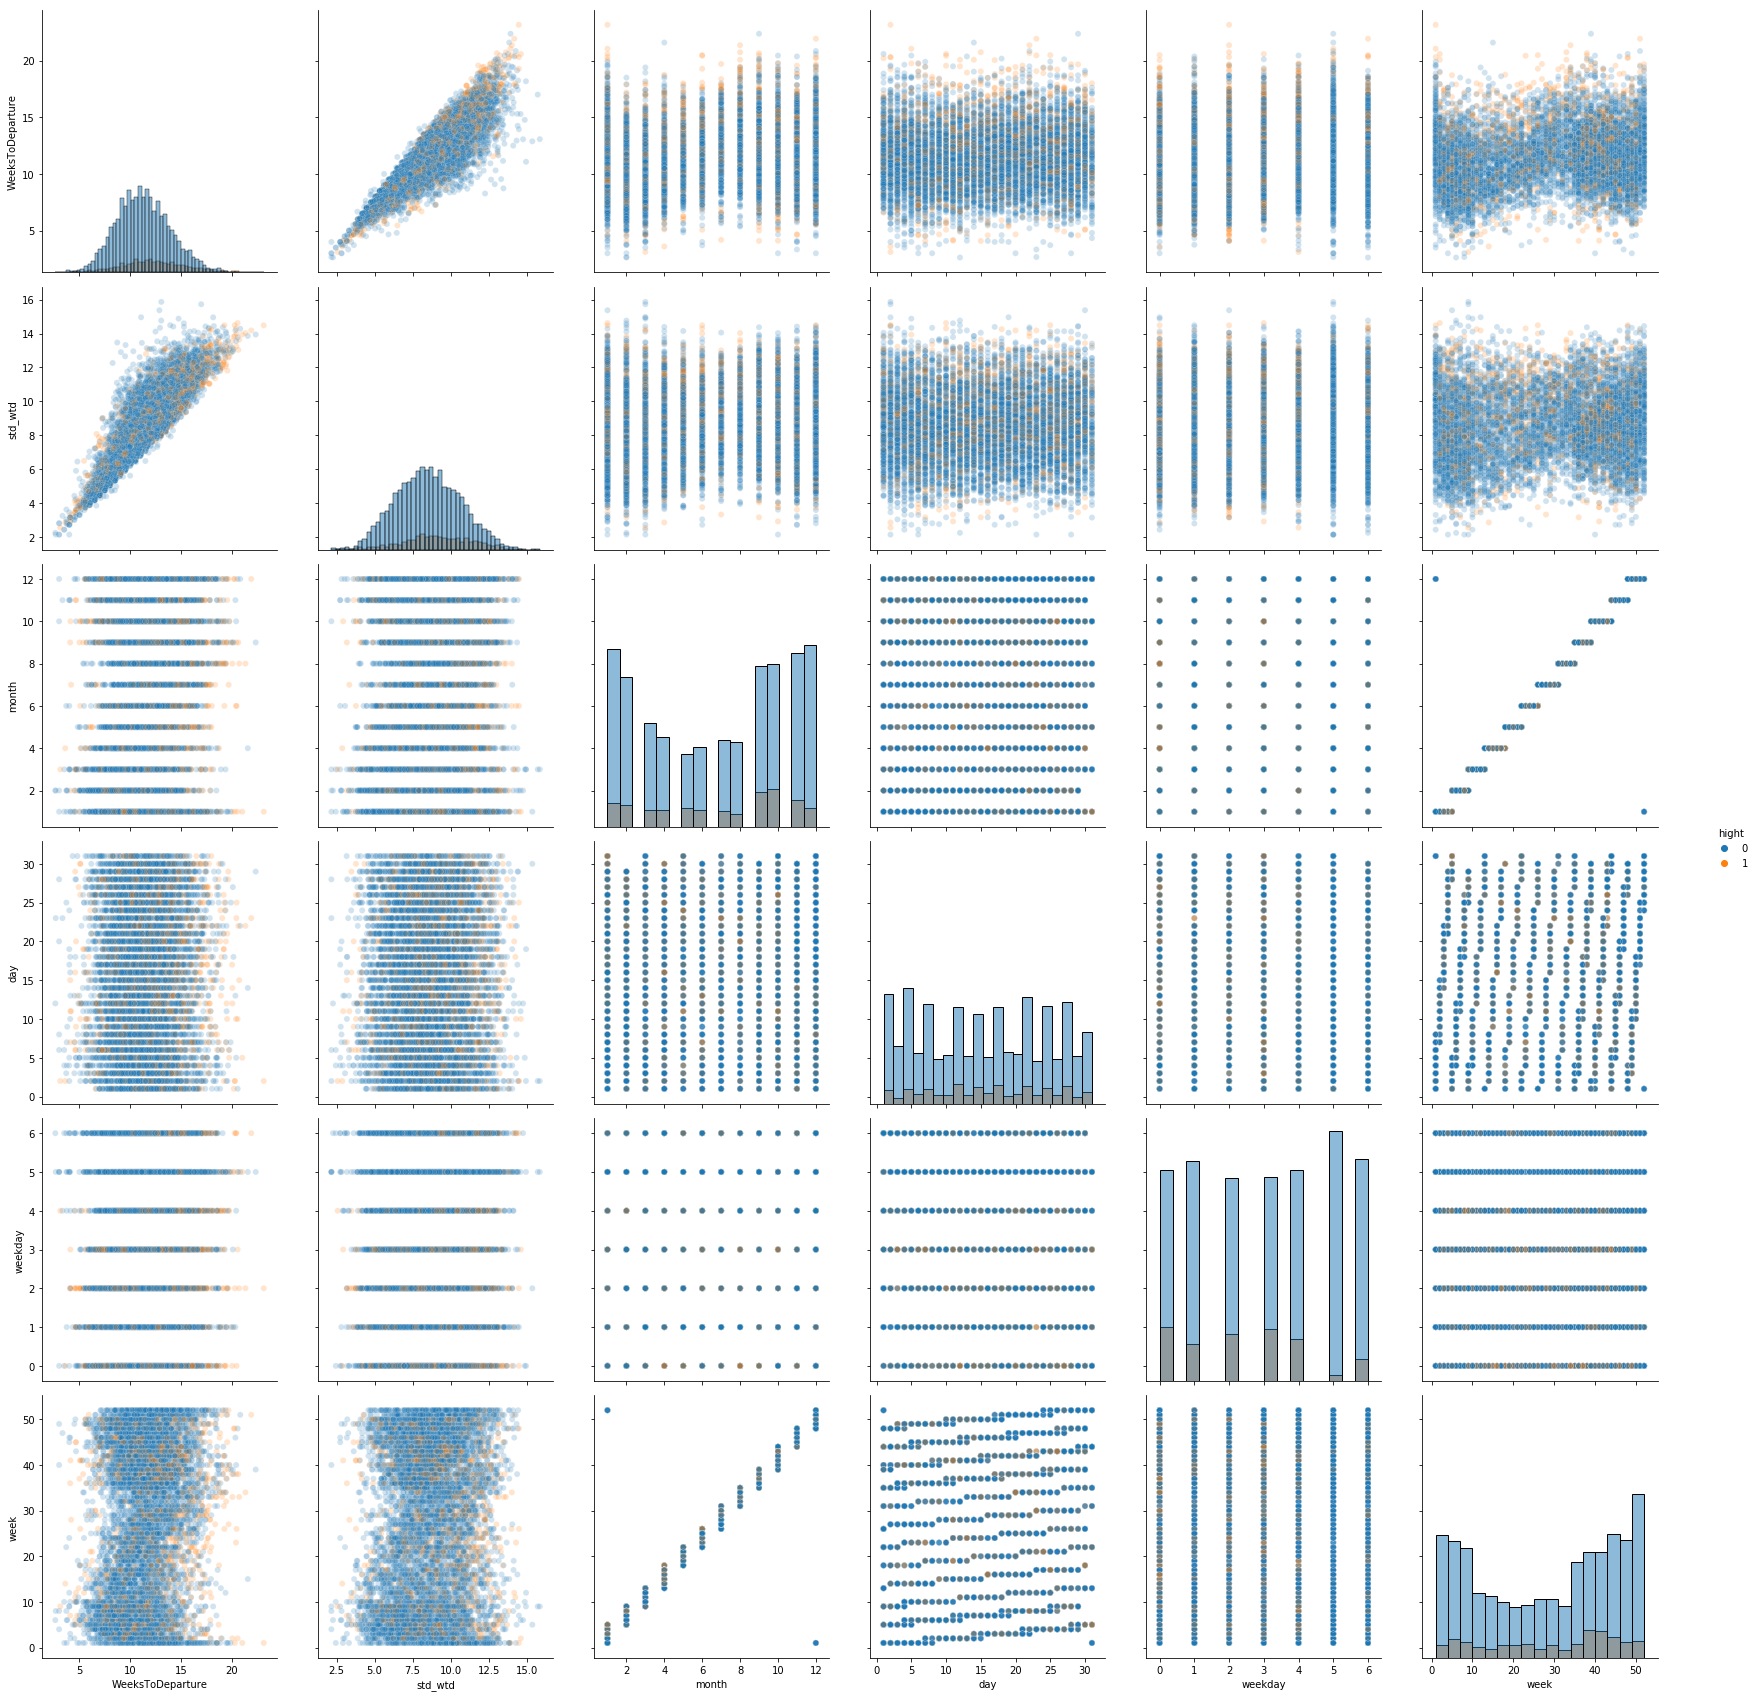

In [71]:
import seaborn as sns

#Important de plot moins de value pour avoir un resultat plus rapide
columns = [ 'WeeksToDeparture', 'std_wtd', 'month', 'day', 'weekday', 'week']
sns.pairplot(data=X , vars=columns,
             hue='hight', plot_kws={'alpha': 0.2}, height=4,
             diag_kind='hist');

In [48]:
X.head()

DateOfDeparture Departure Arrival  WeeksToDeparture    log_PAX   std_wtd  \
0      2012-06-19       ORD     DFW         12.875000  12.331296  9.812647   
1      2012-09-10       LAS     DEN         14.285714  10.775182  9.466734   
2      2012-10-05       DEN     LAX         10.863636  11.083177  9.035883   
3      2011-10-09       ATL     ORD         11.480000  11.169268  7.990202   
4      2012-02-21       DEN     SFO         11.450000  11.269364  9.517159   

   year  month  day  weekday  week  n_days  hight  low  
0  2012      6   19        1    25   15510      1    0  
1  2012      9   10        0    37   15593      0    0  
2  2012     10    5        4    40   15618      0    0  
3  2011     10    9        6    40   15256      0    0  
4  2012      2   21        1     8   15391      0    0

In [63]:
data_merged2 = X.copy()
we = [4, 5, 6]

#Chritmas 
data_merged2['Chritmas'] = np.where((data_merged2['week']==52) |
                                    (data_merged2['week']==51) & (data_merged2['weekday'].isin(we)) |
                                    (data_merged2['week']==1) , 1, 0)

#Labor weekend
data_merged2['LB_Day'] = np.where((data_merged2['week']==36)  & (data_merged2['weekday'] ==0)|
                                    (data_merged2['week']==35) & (data_merged2['weekday'].isin(we)), 1, 0)

#Memorial Day
data_merged2['MM_Day'] = np.where((data_merged2['week']==22) & (data_merged2['weekday'] ==0)|
                                    (data_merged2['week']==21) & (data_merged2['weekday'].isin(we)), 1, 0)

#4th July 
data_merged2['4July'] = np.where((data_merged2['week']==27) |
                                    (data_merged2['week']==26) & (data_merged2['weekday'].isin(we)), 1, 0)

#Thanksgiving
data_merged2['ThG'] = np.where((data_merged2['week']==47) |
                                    (data_merged2['week']==46) & (data_merged2['weekday'].isin(we)), 1, 0)

#Summer Friday
summer = range(22, 35)
data_merged2['Sum'] = np.where((data_merged2['week'].isin(summer)) & (data_merged2['weekday']==5), 1, 0)

In [69]:
X.columns

Index(['DateOfDeparture', 'Departure', 'Arrival', 'WeeksToDeparture',
       'log_PAX', 'std_wtd', 'year', 'month', 'day', 'weekday', 'week',
       'n_days', 'hight', 'low'],
      dtype='object')

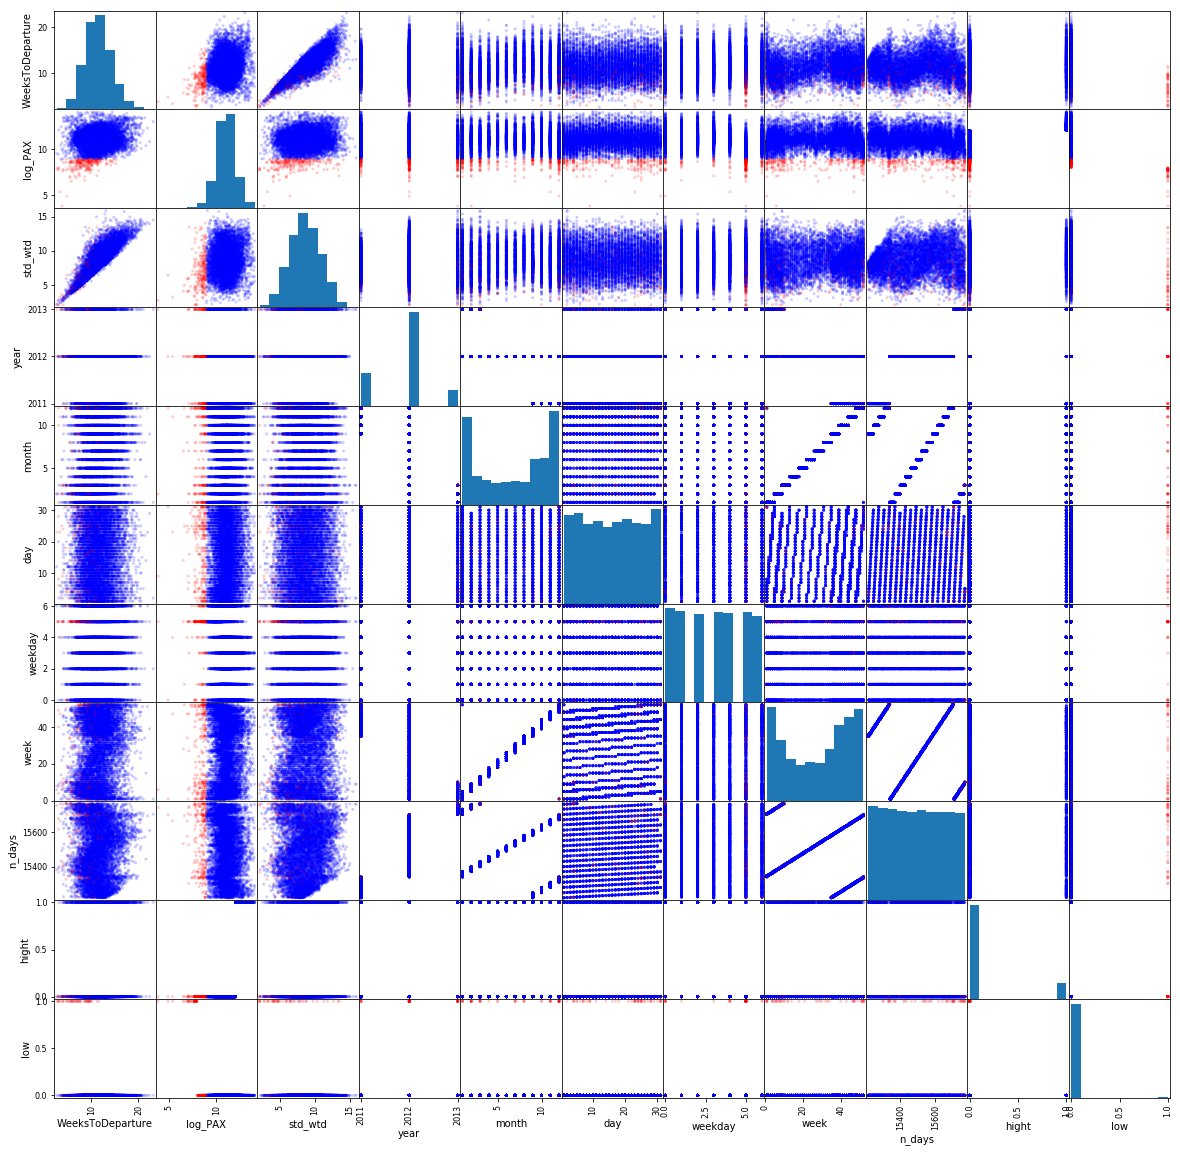

In [75]:
columns = [  'month','weekday','WeeksToDeparture']
from pandas.plotting import scatter_matrix
import matplotlib.colors as col
scatter_matrix(X, alpha=0.2, figsize=(20, 20), c=data["log_PAX"], cmap=col.ListedColormap(['red', 'blue']));